<a href="https://colab.research.google.com/github/soufianegouait/Mentorness/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import joblib

Step 1: Loading and Inspecting the Data
Load the dataset from CSV files and inspect the initial few rows. / Exploratory Data Analysis (EDA)

In [ ]:
# Step 1: Load and inspect the data
train_data = pd.read_csv('Train_data.csv')
test_data = pd.read_csv('test_data.csv')

In [ ]:
# Inspect the data
print("Training Data:")


# first 5 rows of the dataframe
train_data.head()

Training Data:


,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,0
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,1
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,1
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,1
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,1


In [ ]:
# statistical Measures of the dataset
train_data.describe()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
count,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,...,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000
mean,0.362828,0.393648,0.586190,0.504027,0.511086,0.506590,0.507152,0.492200,0.484459,0.562273,...,0.439112,0.421777,0.546079,0.434972,0.452138,0.582255,0.425075,0.454597,0.430308,0.763505
std,0.251889,0.239449,0.271498,0.303347,0.277270,0.266565,0.285537,0.275735,0.315618,0.273281,...,0.263779,0.252124,0.269511,0.267388,0.242075,0.250915,0.229298,0.251189,0.243034,0.425020
min,0.010994,0.012139,0.003021,0.012594,0.010139,0.044565,0.011772,0.046942,0.000554,0.006947,...,0.016256,0.033037,0.039505,0.007186,0.013013,0.114550,0.021239,0.007490,0.004867,0.000000
25%,0.129198,0.195818,0.346092,0.200865,0.259467,0.263589,0.288132,0.287532,0.207938,0.355774,...,0.188750,0.217757,0.307132,0.211078,0.239659,0.339125,0.213026,0.288961,0.196192,1.000000
50%,0.351722,0.397083,0.609836,0.533962,0.527381,0.467431,0.493428,0.453052,0.420723,0.603635,...,0.466375,0.413071,0.512941,0.373235,0.486317,0.610860,0.417295,0.426863,0.481601,1.000000
75%,0.582278,0.582178,0.791215,0.754841,0.743164,0.743670,0.753657,0.722293,0.778160,0.741381,...,0.652514,0.604753,0.779378,0.710319,0.616181,0.800666,0.606719,0.682164,0.631426,1.000000
max,0.968460,0.905026,0.983306,0.999393,0.990786,1.000000,0.977520,0.995263,0.963235,0.975586,...,0.950218,0.983826,0.989411,0.942549,0.994460,0.996873,0.925924,0.972803,0.797906,1.000000


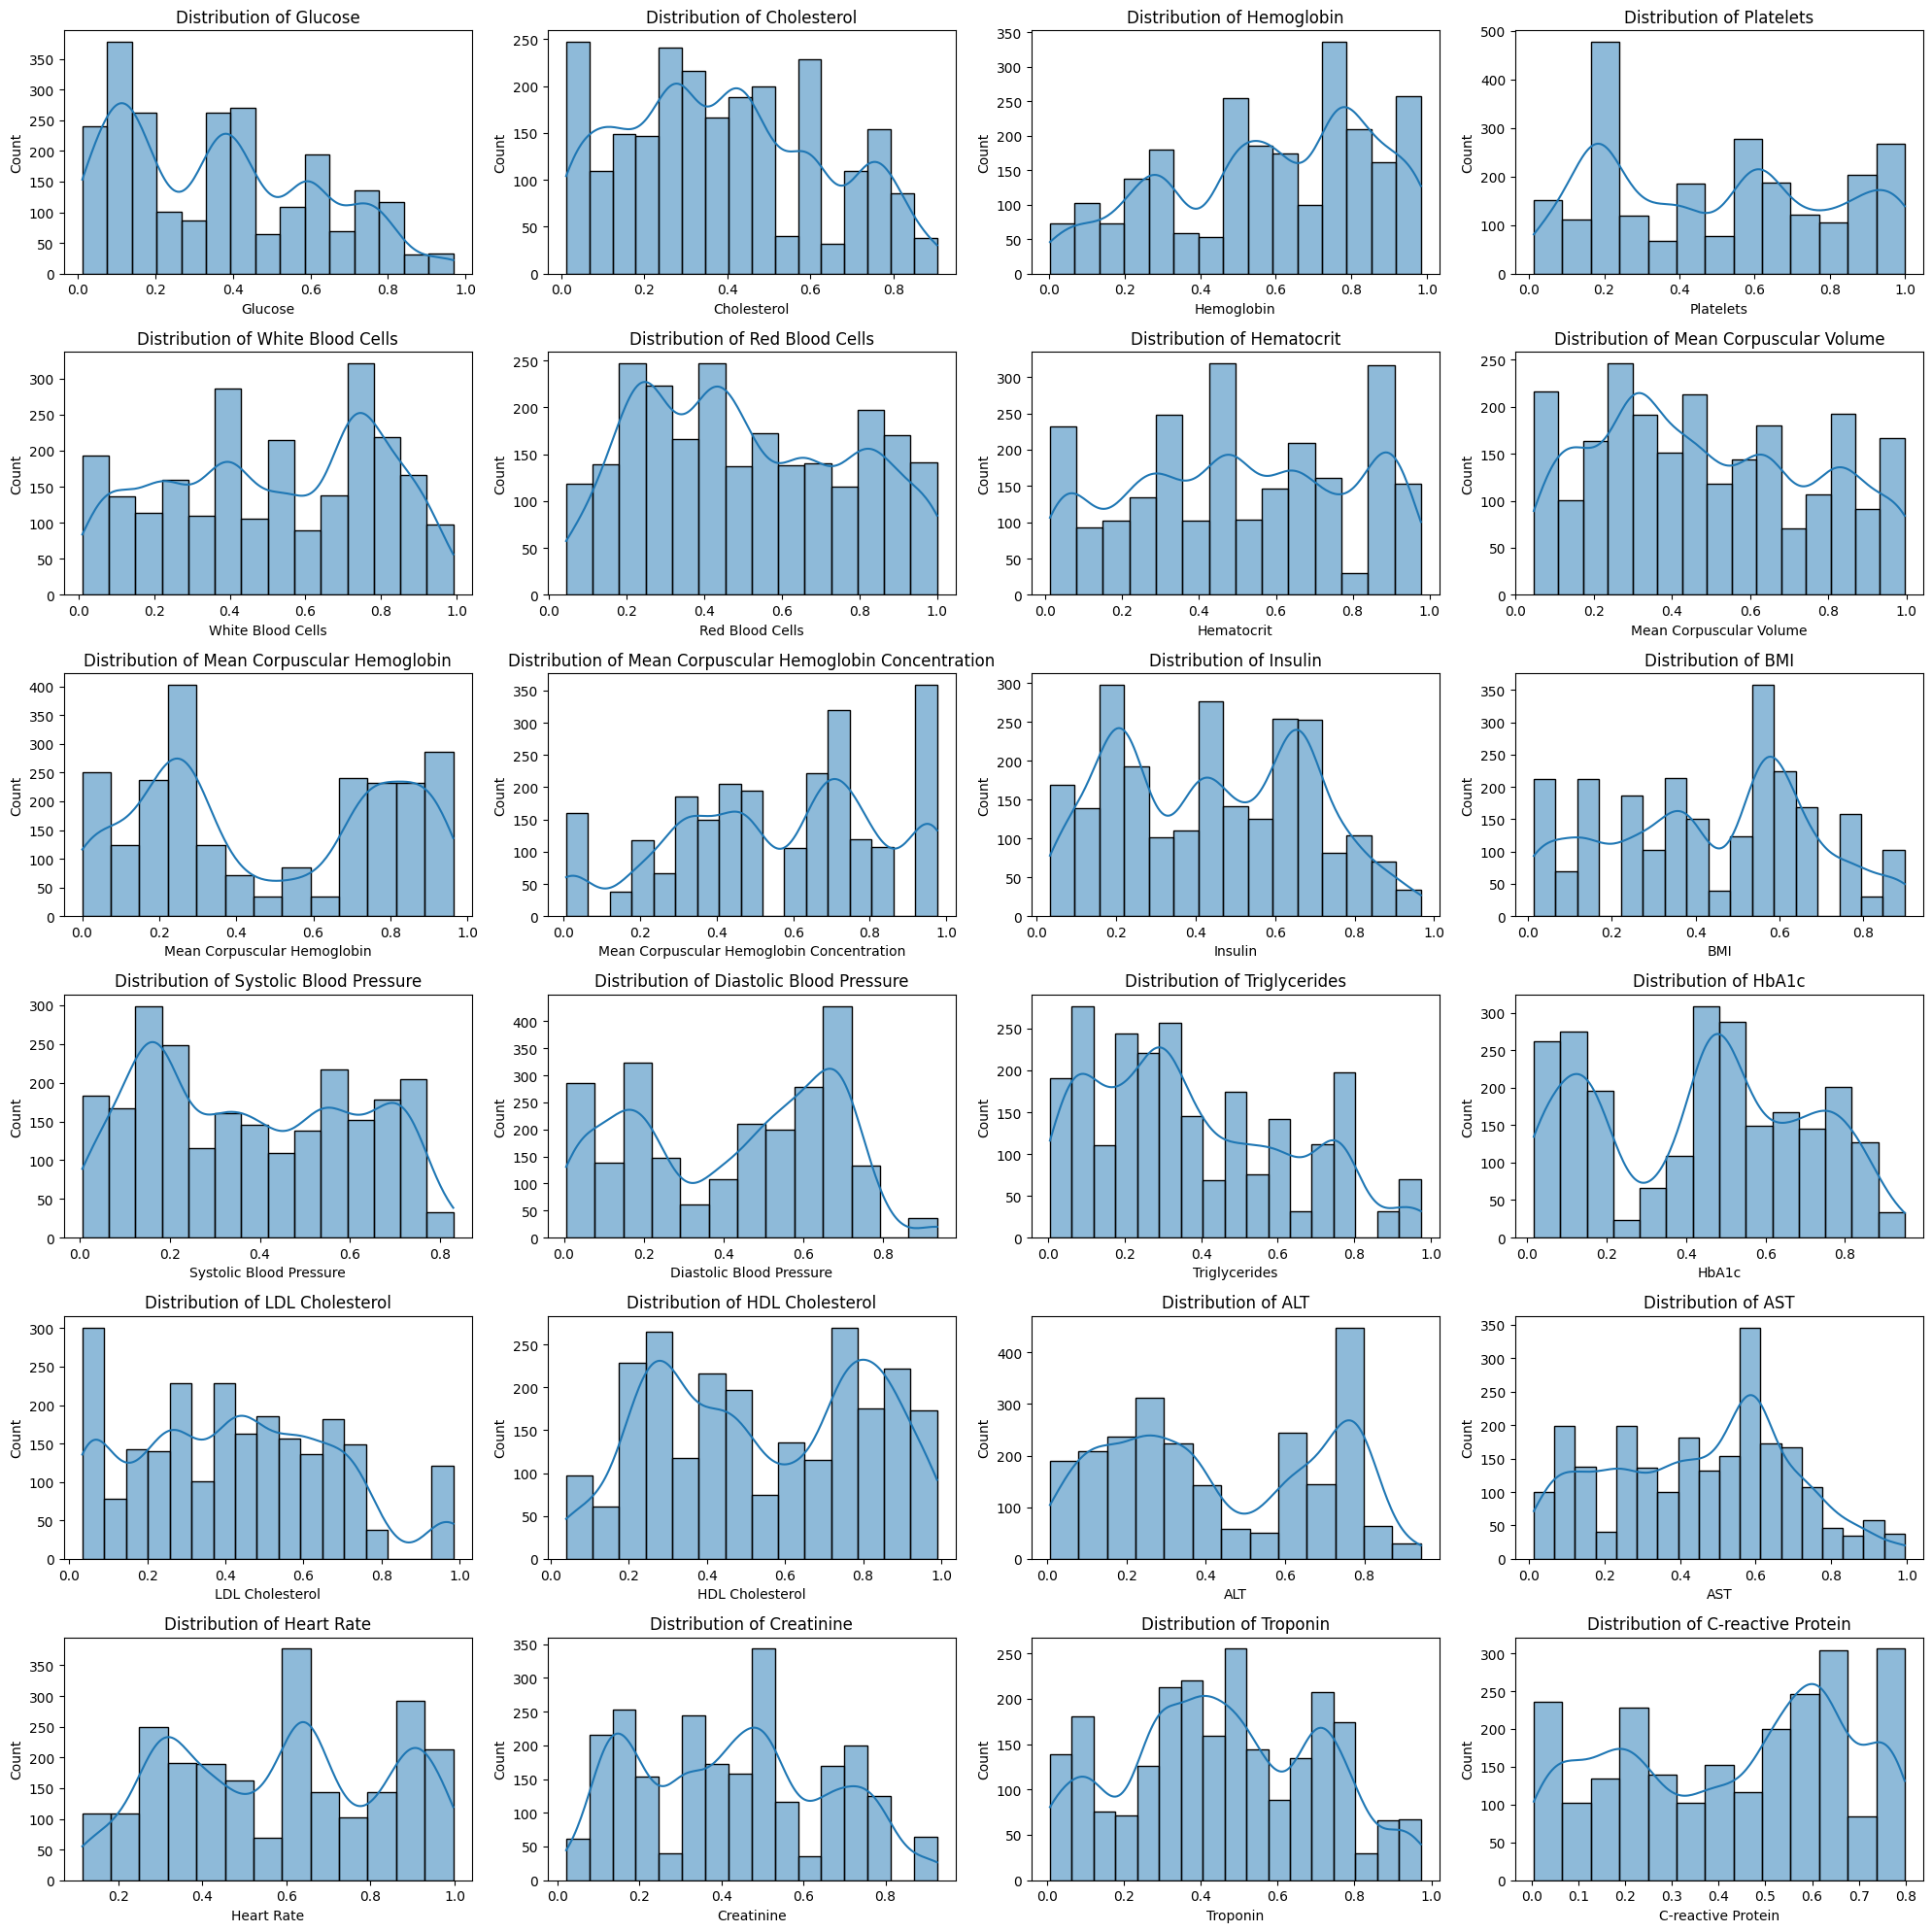

In [ ]:
# List of continuous variables
continuous_vars = ['Glucose', 'Cholesterol', 'Hemoglobin', 'Platelets', 'White Blood Cells', 'Red Blood Cells',
                   'Hematocrit', 'Mean Corpuscular Volume', 'Mean Corpuscular Hemoglobin',
                   'Mean Corpuscular Hemoglobin Concentration', 'Insulin', 'BMI', 'Systolic Blood Pressure',
                   'Diastolic Blood Pressure', 'Triglycerides', 'HbA1c', 'LDL Cholesterol', 'HDL Cholesterol',
                   'ALT', 'AST', 'Heart Rate', 'Creatinine', 'Troponin', 'C-reactive Protein']

# Plot histograms
plt.figure(figsize=(20, 20))
for i, var in enumerate(continuous_vars):
    plt.subplot(6, 4, i+1)
    sns.histplot(train_data[var], kde=True)
    plt.title(f'Distribution of {var}')
plt.tight_layout()
plt.show()


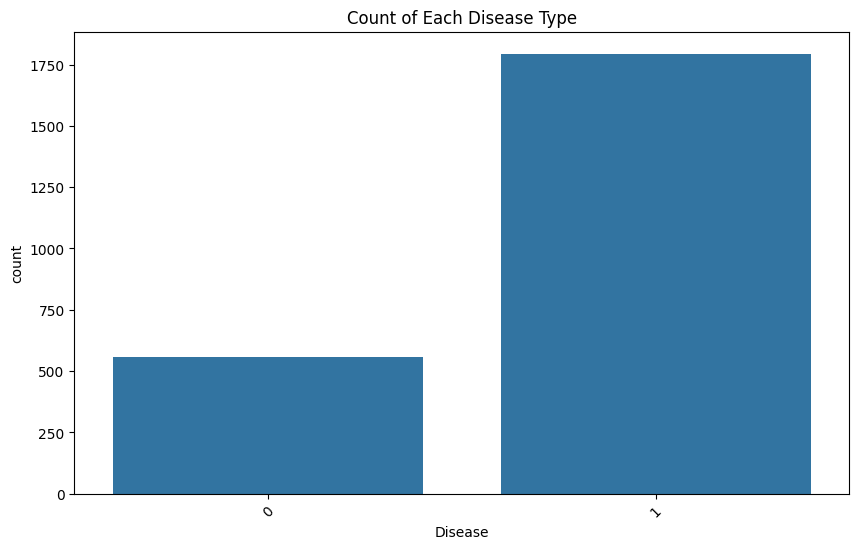

In [ ]:
# Count plot for Disease variable
plt.figure(figsize=(10, 6))
sns.countplot(x='Disease', data=train_data)
plt.title('Count of Each Disease Type')
plt.xticks(rotation=45)
plt.show()


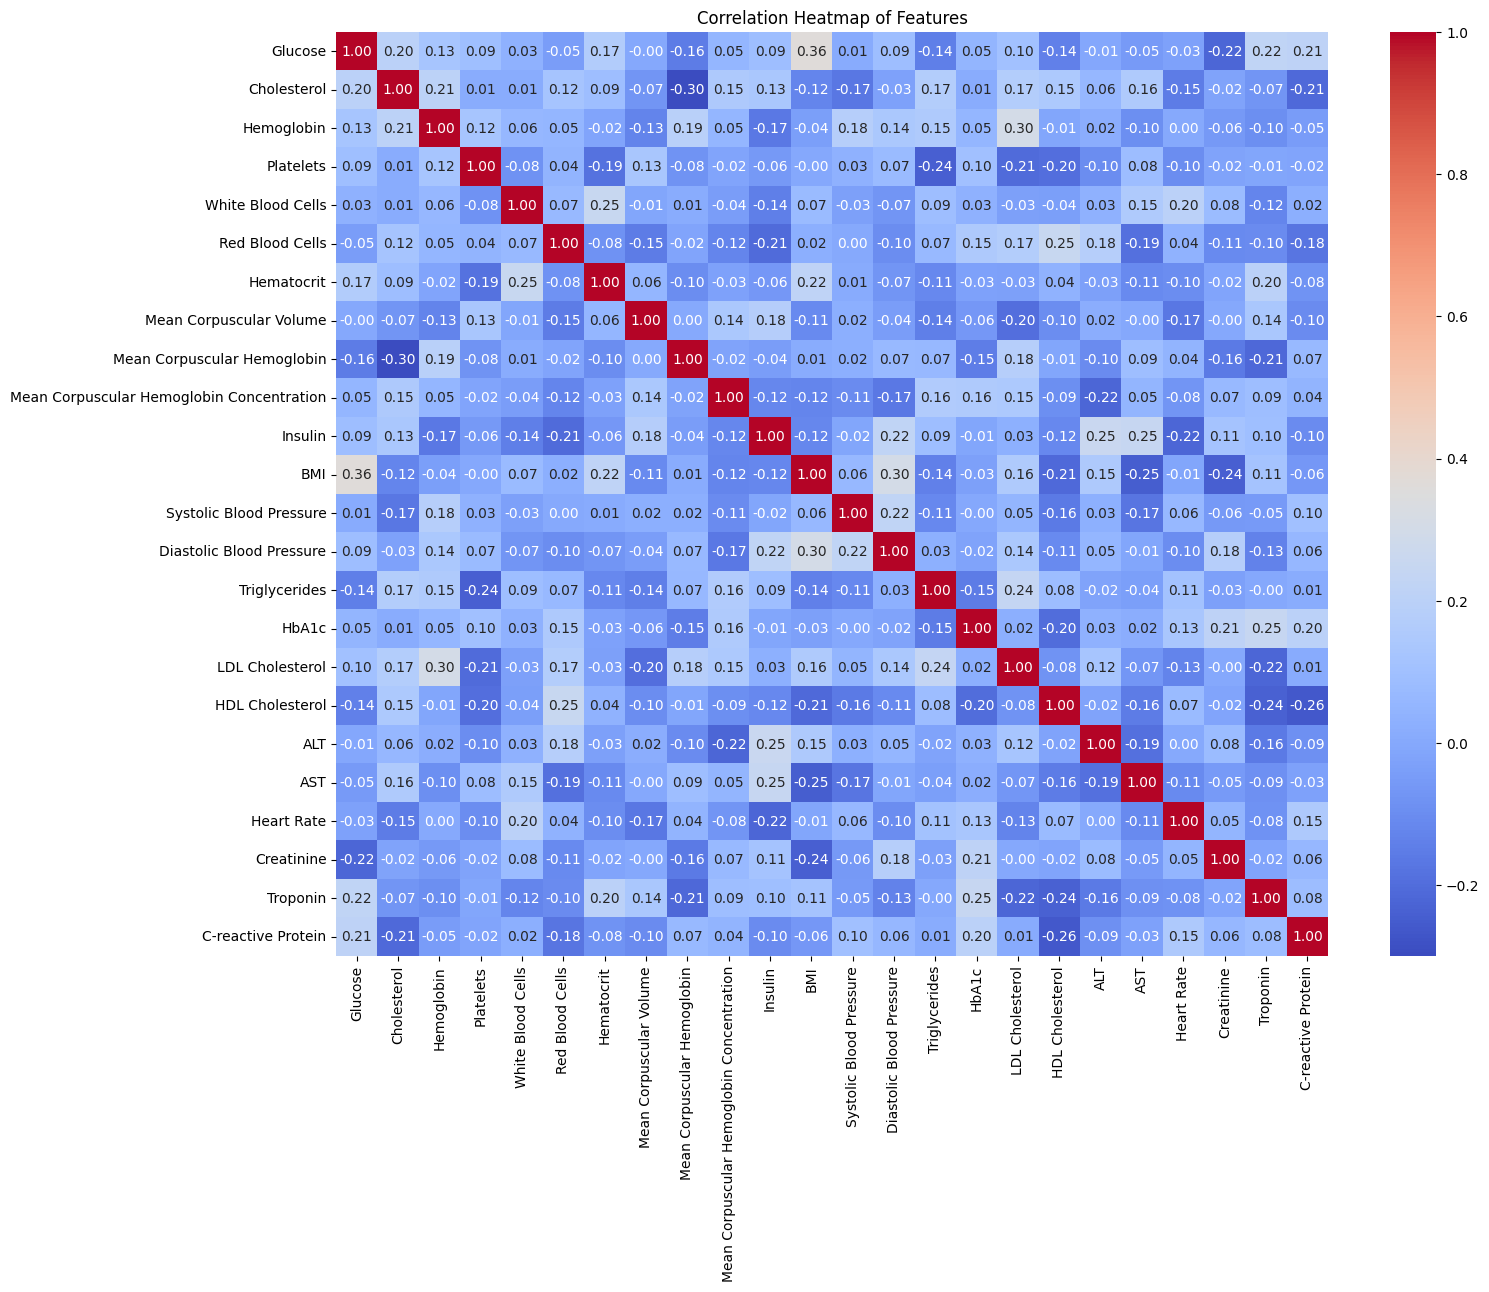

In [ ]:
# Calculate correlations
correlation_matrix = train_data[continuous_vars].corr()

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()


Step 2: Preprocessing the Data
Convert Disease Labels to Binary: Map the existing disease categories to binary values (1 for diseased and 0 for non-diseased).
Handle Missing Values: Fill missing values with the mean of the respective columns.

In [ ]:
# Define the disease mapping
disease_mapping = {
    'Thalasse': 1,
    'Diabetes': 1,
    'Heart Di': 1,
    'Anemia': 1,
    'Thromboc': 1,
    'Healthy': 0  # Assuming 'Healthy' is the label for non-diseased individuals
}

# Convert the Disease column to binary
train_data['Disease'] = train_data['Disease'].map(disease_mapping)
test_data['Disease'] = test_data['Disease'].map(disease_mapping)

# Handle missing values by filling with the mean of the column
train_data.fillna(train_data.mean(), inplace=True)
test_data.fillna(test_data.mean(), inplace=True)

# Verify conversion and missing value handling
print("\nBinary Disease Labels (Training):", train_data['Disease'].unique())
print("Binary Disease Labels (Test):", test_data['Disease'].unique())



Binary Disease Labels (Training): [0 1]
Binary Disease Labels (Test): [1 0]


Step 3: Feature Engineering and Scaling
Separate the features and target variable, and scale the features to ensure they are on the same scale




In [ ]:
# Separate features and target variable in training data
X_train = train_data.drop(columns=['Disease'])
y_train = train_data['Disease']

# Separate features and target variable in test data
X_test = test_data.drop(columns=['Disease'])
y_test = test_data['Disease']

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Step 4: Model Selection and Training
We will use a Random Forest classifier and perform hyperparameter tuning using GridSearchCV.

In [ ]:
# Define the model and hyperparameters
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get the best model from grid search
best_rf = grid_search.best_estimator_

print("\nBest Hyperparameters:", grid_search.best_params_)



Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


Step 5: Model Evaluation
Evaluate the model on the test set using metrics such as accuracy, precision, recall, and F1-score. Additionally, display the confusion matrix and classification report.

In [ ]:
# Predict on the test set
y_pred = best_rf.predict(X_test_scaled)

# Print evaluation metrics
print("\nEvaluation Metrics:")
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))

# Confusion Matrix and Classification Report
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))



Evaluation Metrics:
Accuracy: 0.9382716049382716
Precision: 0.9934354485776805
Recall: 0.9438669438669439
F1 Score: 0.9680170575692963

Confusion Matrix:
 [[  2   3]
 [ 27 454]]

Classification Report:
               precision    recall  f1-score   support

           0       0.07      0.40      0.12         5
           1       0.99      0.94      0.97       481

    accuracy                           0.94       486
   macro avg       0.53      0.67      0.54       486
weighted avg       0.98      0.94      0.96       486



In [ ]:
# Define the SVM model and hyperparameters
svm = SVC(random_state=42)
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Perform grid search with cross-validation
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_svm.fit(X_train_scaled, y_train)

# Get the best model from grid search
best_svm = grid_search_svm.best_estimator_

print("\nBest Hyperparameters for SVM:", grid_search_svm.best_params_)



Best Hyperparameters for SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


In [ ]:
# Predict on the test set with SVM
y_pred_svm = best_svm.predict(X_test_scaled)

# Print evaluation metrics for SVM
print("\nEvaluation Metrics for SVM:")
print('Accuracy:', accuracy_score(y_test, y_pred_svm))
print('Precision (macro):', precision_score(y_test, y_pred_svm, average='macro'))
print('Recall (macro):', recall_score(y_test, y_pred_svm, average='macro'))
print('F1 Score (macro):', f1_score(y_test, y_pred_svm, average='macro'))

# Confusion Matrix and Classification Report for SVM
print('\nConfusion Matrix for SVM:\n', confusion_matrix(y_test, y_pred_svm))
print('\nClassification Report for SVM:\n', classification_report(y_test, y_pred_svm))



Evaluation Metrics for SVM:
Accuracy: 0.3230452674897119
Precision (macro): 0.19851436720737634
Recall (macro): 0.28941326530612244
F1 Score (macro): 0.18534160575797345

Confusion Matrix for SVM:
 [[ 43  29   8   0   3   1]
 [ 77 104  62   0  34  17]
 [  1   0   3   0   1   0]
 [ 12   6  16   0   3   2]
 [ 11  11  18   0   4   4]
 [  3   4   4   0   2   3]]

Classification Report for SVM:
               precision    recall  f1-score   support

      Anemia       0.29      0.51      0.37        84
    Diabetes       0.68      0.35      0.46       294
     Healthy       0.03      0.60      0.05         5
    Heart Di       0.00      0.00      0.00        39
    Thalasse       0.09      0.08      0.08        48
    Thromboc       0.11      0.19      0.14        16

    accuracy                           0.32       486
   macro avg       0.20      0.29      0.19       486
weighted avg       0.47      0.32      0.36       486



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Step 6: Model Saving and Deployment
Save the trained model and the scaler for future use.

In [ ]:
# Save the best model and scaler
joblib.dump(best_rf, 'best_rf_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("\nModel and Scaler saved successfully.")



Model and Scaler saved successfully.
